In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [4]:
df = pd.read_csv('C:/users/orion.darley/desktop/CS230/btc_training.csv',index_col="Date",parse_dates=True)


# Data Prep

In [5]:
df.head()

,Price,Open,High,Low,Vol2,Change %
Date,,,,,,
2019-03-24,3994.7,4002.6,4005.7,3967.0,2040000,-0.20%
2019-03-23,4002.5,3990.4,4018.2,3980.8,2000000,0.30%
2019-03-22,3990.4,3982.2,4005.7,3971.8,2830000,0.21%
2019-03-21,3982.2,4041.2,4064.0,3923.8,3880000,-1.46%
2019-03-20,4041.2,4017.0,4050.0,3985.3,3180000,0.60%


In [6]:
df = df.drop(['Change %'], axis = 1)

In [7]:
df.isna().any()

Price    False
Open     False
High     False
Low      False
Vol2     False
dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2549 entries, 2019-03-24 to 2012-04-01
Data columns (total 5 columns):
Price    2549 non-null float64
Open     2549 non-null float64
High     2549 non-null float64
Low      2549 non-null float64
Vol2     2549 non-null int64
dtypes: float64(4), int64(1)
memory usage: 119.5 KB


# EDA

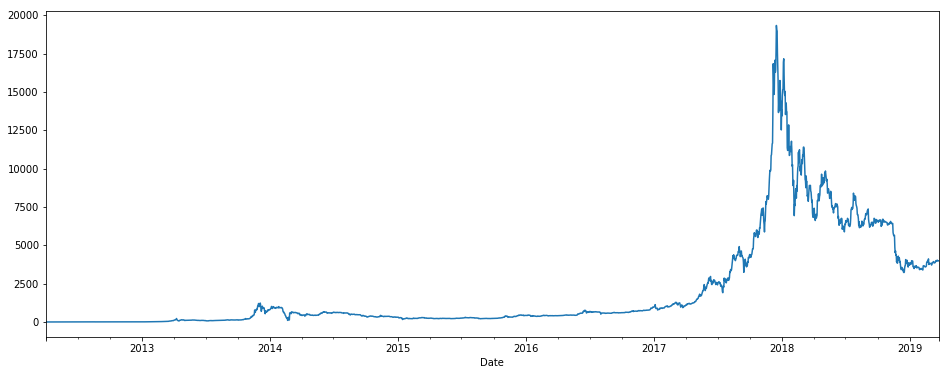

In [9]:
df['Price'].plot(figsize=(16,6))

In [10]:
# remove tail (where there is little predictive information)
df = df[(df.index >= '2017-01-01')]
print(df.tail())

             Price    Open    High     Low    Vol2
Date                                              
2017-01-05   989.3  1135.4  1150.6   874.5  240010
2017-01-04  1135.4  1033.3  1148.5  1022.3  156270
2017-01-03  1033.3  1017.0  1035.5  1006.5   54790
2017-01-02  1017.0   995.4  1031.7   990.2   64950
2017-01-01   995.4   963.4  1001.6   956.1   41150


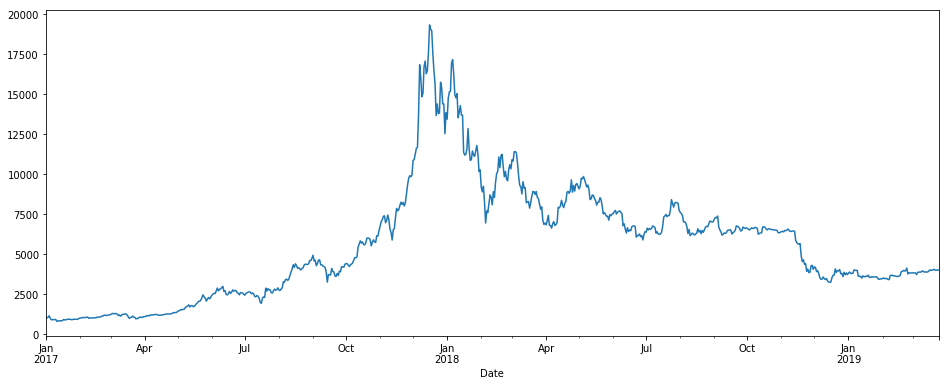

In [11]:
df['Price'].plot(figsize=(16,6))

In [12]:
# 7 day rolling mean
df.rolling(7).mean().head(20)

,Price,Open,High,Low,Vol2
Date,,,,,
2019-03-24,NaN,NaN,NaN,NaN,NaN
2019-03-23,NaN,NaN,NaN,NaN,NaN
2019-03-22,NaN,NaN,NaN,NaN,NaN
2019-03-21,NaN,NaN,NaN,NaN,NaN
2019-03-20,NaN,NaN,NaN,NaN,NaN
2019-03-19,NaN,NaN,NaN,NaN,NaN
2019-03-18,4002.600000,4000.728571,4029.400000,3965.657143,2.791429e+06
2019-03-17,4000.714286,4001.271429,4029.985714,3964.128571,2.767143e+06
2019-03-16,4001.271429,3991.842857,4034.614286,3955.971429,2.975714e+06


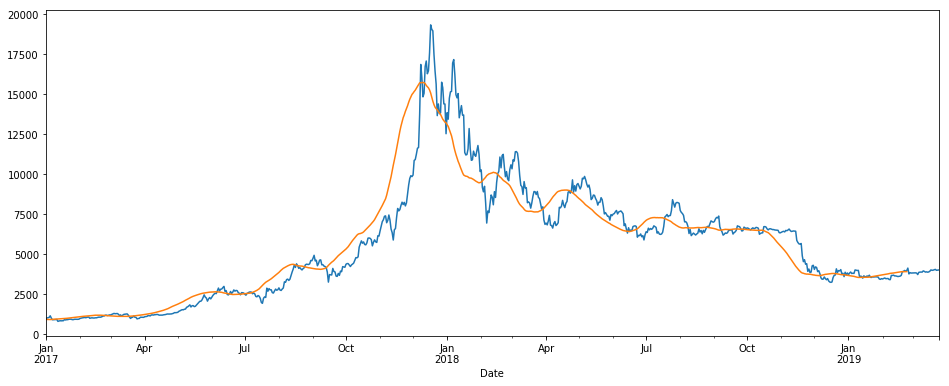

In [13]:
#Compare Open to smoothed average Close or "Price"
df['Open'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Price'].plot()

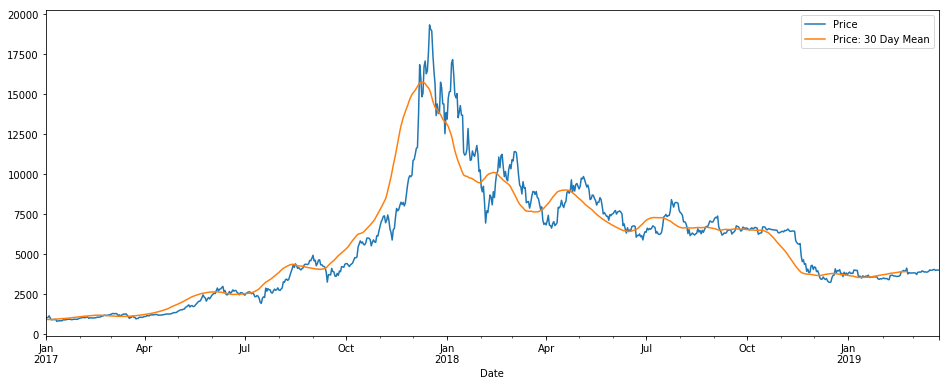

In [14]:
#Compare Price to smoothed ave 30 day Price
df['Price: 30 Day Mean'] = df['Price'].rolling(window=30).mean()
df[['Price','Price: 30 Day Mean']].plot(figsize=(16,6))

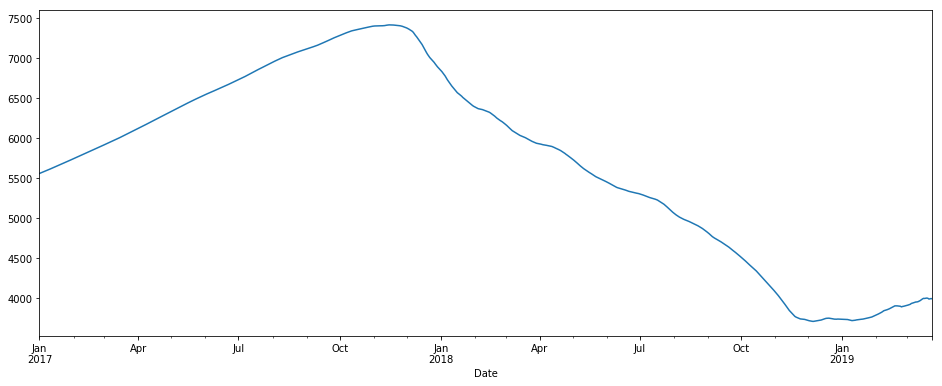

In [15]:
#Specify a minimum number of periods
df['Price'].expanding(min_periods=1).mean().plot(figsize=(16,6))

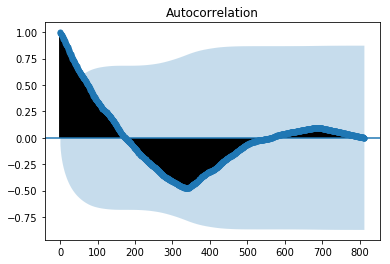

In [26]:
#Plot ACF for recent time series for examiniation 
#Not working???
from statsmodels.graphics.tsaplots import plot_acf
from pandas import Series
from matplotlib import pyplot
series = df[(df.index >= '2019-03-01')]
series1 = df['Price']
plot_acf(series1)
pyplot.show()

# Building Training Dataset, Scale, and Structure

In [27]:
training_set=df['Price']
training_set=pd.DataFrame(training_set)

In [28]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [29]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 813):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building the LSTM

In [30]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [35]:
# Initialising the LSTM
m1 = Sequential()
# Adding the first LSTM layer and some Dropout regularization
m1.add(LSTM(activation='relu', units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
m1.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularization
m1.add(LSTM(activation='relu', units = 50, return_sequences = True))
m1.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularization
m1.add(LSTM(activation='relu', units = 50, return_sequences = True))
m1.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularization
m1.add(LSTM(activation='relu', units = 50))
m1.add(Dropout(0.2))
# Adding the output layer
m1.add(Dense(units = 1))
# Compiling the LSTM
m1.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the model to the Training set
m1_history = m1.fit(X_train, y_train, epochs = 50, batch_size = 32)
m1_history

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
753/753 [==============================] - 20s 26ms/step - loss: 0.0496
Epoch 2/50
753/753 [==============================] - 9s 12ms/step - loss: 0.0147
Epoch 3/50
753/753 [==============================] - 11s 15ms/step - loss: 0.0102
Epoch 4/50
753/753 [==============================] - 9s 12ms/step - loss: 0.0083
Epoch 5/50
753/753 [==============================] - 9s 12ms/step - loss: 0.0062
Epoch 6/50
753/753 [==============================] - 9s 12ms/step - loss: 0.0067
Epoch 7/50
753/753 [==============================] - 9s 12ms/step - loss: 0.0057
Epoch 8/50
753/753 [==============================] - 8s 11ms/step - loss: 0.0055
Epoch 9/50
753/753 [==============================] - 9s 13ms/step - loss: 0.0048
Epoch 10/50
753/753 [==============================] - 10s 13ms/step - loss: 0.0041
Epoch 11/50
753/753 [==============================] - 9s 12ms/step - loss: 0.0045
Epoch 12/50
753/753 [========================

In [48]:
# Initialising the LSTM
m2 = Sequential()
# Adding the first LSTM layer and some Dropout regularization
m2.add(LSTM(activation='tanh', units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
m2.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularization
m2.add(LSTM(activation='tanh', units = 50, return_sequences = True))
m2.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularization
m2.add(LSTM(activation='tanh', units = 50, return_sequences = True))
m2.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularization
m2.add(LSTM(activation='tanh', units = 50))
m2.add(Dropout(0.2))
# Adding the output layer
m2.add(Dense(units = 1))
# Compiling the LSTM
m2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the model to the Training set
m2_history = m2.fit(X_train, y_train, epochs = 50, batch_size = 32)
m2_history

Epoch 1/50
753/753 [==============================] - 12s 16ms/step - loss: 0.0314
Epoch 2/50
753/753 [==============================] - 7s 9ms/step - loss: 0.0087
Epoch 3/50
753/753 [==============================] - 5s 6ms/step - loss: 0.0063
Epoch 4/50
753/753 [==============================] - 6s 8ms/step - loss: 0.0048
Epoch 5/50
753/753 [==============================] - 6s 8ms/step - loss: 0.0053
Epoch 6/50
753/753 [==============================] - 5s 7ms/step - loss: 0.0045
Epoch 7/50
753/753 [==============================] - 9s 12ms/step - loss: 0.0044
Epoch 8/50
753/753 [==============================] - 7s 10ms/step - loss: 0.0041
Epoch 9/50
753/753 [==============================] - 6s 9ms/step - loss: 0.0040
Epoch 10/50
753/753 [==============================] - 6s 8ms/step - loss: 0.0037
Epoch 11/50
753/753 [==============================] - 5s 7ms/step - loss: 0.0039
Epoch 12/50
753/753 [==============================] - 7s 9ms/step - loss: 0.0040
Epoch 13/50
753/753 [

In [61]:
# Initialising the LSTM
m3 = Sequential()
# Adding the first LSTM layer and some Dropout regularization
m3.add(LSTM(activation='tanh', units = 25, return_sequences = True, input_shape = (X_train.shape[1], 1)))
m3.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularization
m3.add(LSTM(activation='tanh', units = 25, return_sequences = True))
m3.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularization
m3.add(LSTM(activation='tanh', units = 25, return_sequences = True))
m3.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularization
m3.add(LSTM(activation='tanh', units = 25))
m3.add(Dropout(0.2))
# Adding the output layer
m3.add(Dense(units = 1))
# Compiling the LSTM
m3.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the model to the Training set
m3_history = m3.fit(X_train, y_train, epochs = 25, batch_size = 32)
m3_history

Epoch 1/25
753/753 [==============================] - 12s 15ms/step - loss: 0.0350
Epoch 2/25
753/753 [==============================] - 4s 5ms/step - loss: 0.0111
Epoch 3/25
753/753 [==============================] - 4s 5ms/step - loss: 0.0075
Epoch 4/25
753/753 [==============================] - 4s 5ms/step - loss: 0.0085
Epoch 5/25
753/753 [==============================] - 4s 5ms/step - loss: 0.0088
Epoch 6/25
753/753 [==============================] - 4s 5ms/step - loss: 0.0082
Epoch 7/25
753/753 [==============================] - 4s 5ms/step - loss: 0.0061
Epoch 8/25
753/753 [==============================] - 4s 6ms/step - loss: 0.0052
Epoch 9/25
753/753 [==============================] - 4s 6ms/step - loss: 0.0049
Epoch 10/25
753/753 [==============================] - 4s 5ms/step - loss: 0.0052
Epoch 11/25
753/753 [==============================] - 4s 5ms/step - loss: 0.0057
Epoch 12/25
753/753 [==============================] - 4s 5ms/step - loss: 0.0038
Epoch 13/25
753/753 [==

In [62]:
# Initialising the LSTM
m4 = Sequential()
# Adding the first LSTM layer and some Dropout regularization
m4.add(LSTM(activation='tanh', units = 10, return_sequences = True, input_shape = (X_train.shape[1], 1)))
m4.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularization
m4.add(LSTM(activation='tanh', units = 10, return_sequences = True))
m4.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularization
m4.add(LSTM(activation='tanh', units = 10, return_sequences = True))
m4.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularization
m4.add(LSTM(activation='tanh', units = 10))
m4.add(Dropout(0.2))
# Adding the output layer
m4.add(Dense(units = 1))
# Compiling the LSTM
m4.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the model to the Training set
m4_history = m4.fit(X_train, y_train, epochs = 25, batch_size = 32)
m4_history

Epoch 1/25
753/753 [==============================] - 10s 13ms/step - loss: 0.0248
Epoch 2/25
753/753 [==============================] - 4s 6ms/step - loss: 0.0127
Epoch 3/25
753/753 [==============================] - 4s 5ms/step - loss: 0.0105
Epoch 4/25
753/753 [==============================] - 4s 5ms/step - loss: 0.0118
Epoch 5/25
753/753 [==============================] - 4s 5ms/step - loss: 0.0094
Epoch 6/25
753/753 [==============================] - 4s 5ms/step - loss: 0.0094A: 1s - lo
Epoch 7/25
753/753 [==============================] - 4s 5ms/step - loss: 0.0084
Epoch 8/25
753/753 [==============================] - 4s 5ms/step - loss: 0.0094
Epoch 9/25
753/753 [==============================] - 4s 5ms/step - loss: 0.0080
Epoch 10/25
753/753 [==============================] - 4s 5ms/step - loss: 0.0084
Epoch 11/25
753/753 [==============================] - 4s 6ms/step - loss: 0.0085
Epoch 12/25
753/753 [==============================] - 4s 5ms/step - loss: 0.0061
Epoch 13/25
7

In [38]:
#Not Working
#m1_history.plt(figsize=(16,6))

AttributeError: 'History' object has no attribute 'pyplot'

# Making the predictions and visualizing the results

In [49]:
#Retrieving the btc price up to April
df_test = pd.read_csv('C:/users/orion.darley/desktop/CS230/btc_test.csv',index_col="Date",parse_dates=True)

In [50]:
actual_btc_price = df_test.iloc[:, 1:2].values

In [51]:
df_test.head()

,Price,Open,High,Low,Vol2,Change %
Date,,,,,,
2019-04-14,5134.8,5052.0,5153.5,5010.7,566380,1.64%
2019-04-13,5051.8,5054.2,5093.4,5011.6,577160,-0.05%
2019-04-12,5054.2,5022.7,5080.5,4889.2,779140,0.63%
2019-04-11,5022.6,5307.7,5337.0,4948.0,943490,-5.37%
2019-04-10,5307.8,5158.4,5404.1,5142.9,837510,2.89%


In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2019-04-14 to 2019-03-25
Data columns (total 6 columns):
Price       21 non-null float64
Open        21 non-null float64
High        21 non-null float64
Low         21 non-null float64
Vol2        21 non-null int64
Change %    21 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 1.1+ KB


In [53]:
test_set=df_test['Price']
test_set=pd.DataFrame(test_set)

In [54]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2019-04-14 to 2019-03-25
Data columns (total 1 columns):
Price    21 non-null float64
dtypes: float64(1)
memory usage: 336.0 bytes


In [45]:
# Getting the predicted btc price for model 1
df_total = pd.concat((df['Price'], df_test['Price']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = m1.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [65]:
#M2
predicted_stock_price2 = m2.predict(X_test)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)
#M3
predicted_stock_price3 = m3.predict(X_test)
predicted_stock_price3 = sc.inverse_transform(predicted_stock_price3)
#M4
predicted_stock_price4 = m4.predict(X_test)
predicted_stock_price4 = sc.inverse_transform(predicted_stock_price4)

In [46]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()
print(predicted_stock_price.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
0    20 non-null float32
dtypes: float32(1)
memory usage: 160.0 bytes
            0
0  846.648804
1  848.632080
2  858.240540
3  890.374756
4  967.220154


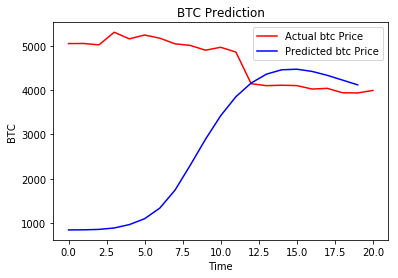

In [47]:
# Visualising the results
plt.plot(actual_btc_price, color = 'red', label = 'Actual btc Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted btc Price')
plt.title('BTC Prediction')
plt.xlabel('Time')
plt.ylabel('BTC')
plt.legend()
plt.show()

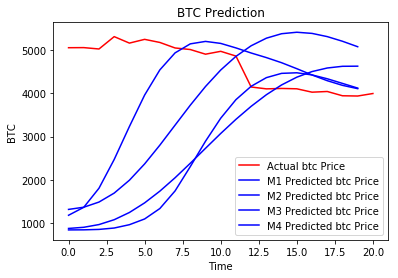

In [66]:
# Visualising the results
plt.plot(actual_btc_price, color = 'red', label = 'Actual btc Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'M1 Predicted btc Price')
plt.plot(predicted_stock_price2, color = 'blue', label = 'M2 Predicted btc Price')
plt.plot(predicted_stock_price3, color = 'blue', label = 'M3 Predicted btc Price')
plt.plot(predicted_stock_price4, color = 'blue', label = 'M4 Predicted btc Price')
plt.title('BTC Prediction')
plt.xlabel('Time')
plt.ylabel('BTC')
plt.legend()
plt.show()